In [1]:
##The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

In [2]:
#Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
#read the dataset
df= pd.read_csv('heart_disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [5]:
df.shape

(908, 13)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [7]:
target=df[['restecg']]
features=df.drop(columns='restecg')

In [8]:
target.value_counts()

restecg         
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

In [9]:
features.shape

(908, 12)

In [100]:
# Check for missing values
features.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

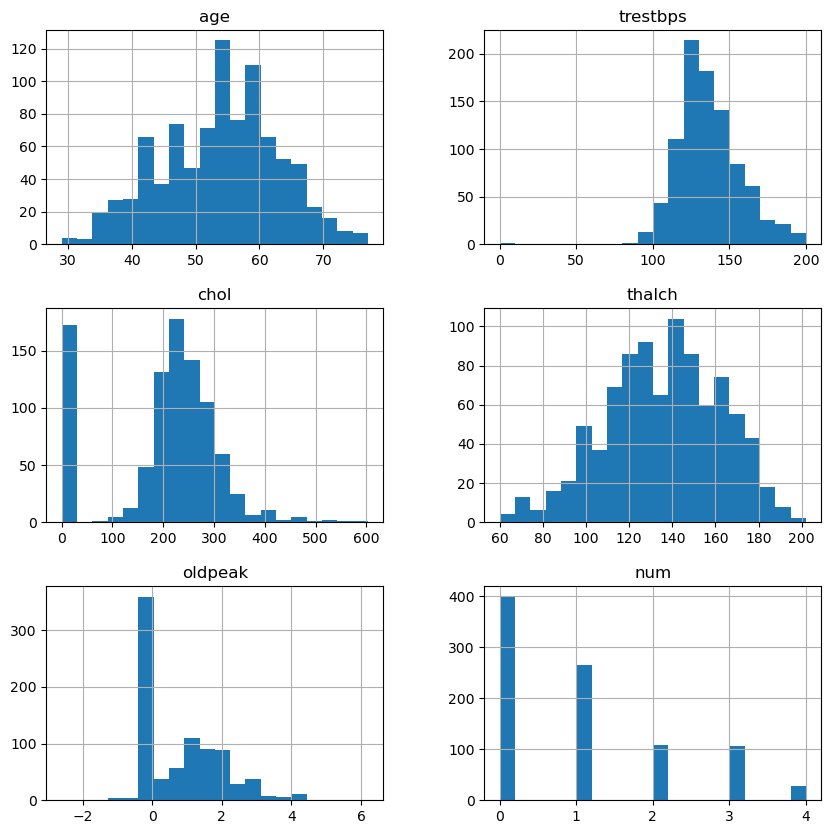

In [11]:
# Visualize distributions of numerical features
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [12]:
cat_col = [i for i in features.columns if features[i].dtype=='O']
cat_col

['sex', 'cp', 'exang', 'slope', 'thal']

In [13]:
num_col = [i for i in features.columns if features[i].dtype!='O']
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']

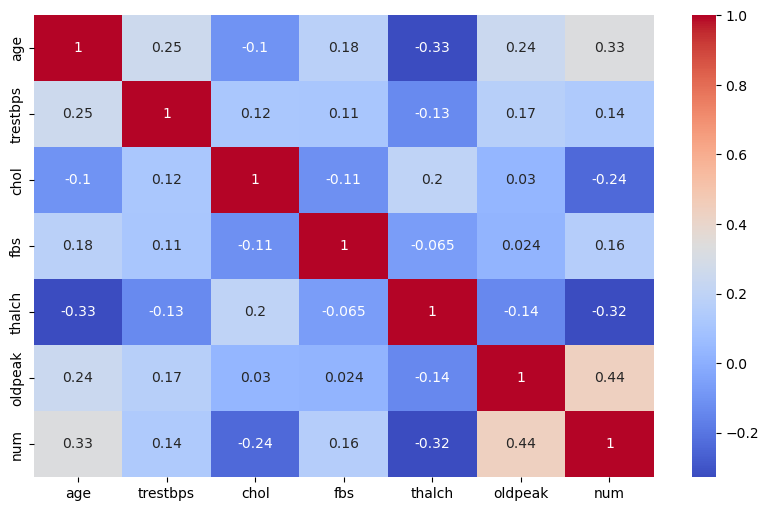

In [14]:
# Check correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
features[cat_col]

,sex,cp,exang,slope,thal
0,Male,typical angina,FALSE,downsloping,fixed defect
1,Male,atypical angina,FALSE,flat,fixed defect
2,Male,asymptomatic,FALSE,flat,fixed defect
3,Male,typical angina,FALSE,flat,fixed defect
4,Male,asymptomatic,TRUE,flat,fixed defect
...,...,...,...,...,...
903,Male,asymptomatic,FALSE,upsloping,reversable defect
904,Male,asymptomatic,TRUE,flat,reversable defect
905,Male,non-anginal,TRUE,downsloping,reversable defect
906,Male,non-anginal,TURE,downsloping,fixed defect


In [16]:
features[num_col]

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,63,145,233,True,150,2.3,0
1,41,135,203,False,132,0.0,0
2,57,140,192,False,148,0.4,0
3,52,118,186,False,190,0.0,0
4,57,110,201,False,126,1.5,0
...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4
904,62,166,170,False,120,3.0,4
905,56,170,0,False,123,2.5,4
906,56,144,208,True,105,NaN,4


In [17]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [18]:
ord_enc = make_pipeline(OrdinalEncoder())

In [19]:
transformer= ColumnTransformer([('ord',ord_enc,cat_col)])

In [20]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['sex', 'cp', 'exang', 'slope', 'thal'])])>

In [21]:
df1 = pd.DataFrame(transformer.fit_transform(features))
df1

,0,1,2,3,4
0,1.0,3.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,3.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
903,1.0,0.0,0.0,2.0,2.0
904,1.0,0.0,1.0,1.0,2.0
905,1.0,2.0,1.0,0.0,2.0
906,1.0,2.0,2.0,0.0,0.0


In [22]:
simple_impute= SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [23]:
df1 =pd.DataFrame(simple_impute.fit_transform(df1))
df1

,0,1,2,3,4
0,1.0,3.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,3.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
903,1.0,0.0,0.0,2.0,2.0
904,1.0,0.0,1.0,1.0,2.0
905,1.0,2.0,1.0,0.0,2.0
906,1.0,2.0,2.0,0.0,0.0


In [24]:
simple_impute1=SimpleImputer(missing_values=np.nan,strategy='median')

In [25]:
df2=pd.DataFrame(simple_impute1.fit_transform(features[num_col]))

In [26]:
stand_sca = StandardScaler()

In [27]:
df2=pd.DataFrame(stand_sca.fit_transform(df2))

In [28]:
df2

,0,1,2,3,4,5,6
0,1.006027,0.567394,0.281297,1.976894,0.524183,1.354403,-0.881977
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718,-0.881977
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305,-0.881977
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815718,-0.881977
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578,-0.881977
...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578,2.615119
904,0.896773,1.597292,-0.281021,-0.505844,-0.595631,2.014874,2.615119
905,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109,2.615119
906,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.343952,2.615119


In [29]:
features1=pd.concat([df1,df2],axis=1,ignore_index=True)
features1
old_name=range(0,5)
new_name=cat_col
old_name1=range(5,12)
new_name1=num_col
features1=features1.rename(columns=dict(zip(old_name,new_name)))
features1

,sex,cp,exang,slope,thal,5,6,7,8,9,10,11
0,1.0,3.0,0.0,0.0,0.0,1.006027,0.567394,0.281297,1.976894,0.524183,1.354403,-0.881977
1,1.0,1.0,0.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718,-0.881977
2,1.0,0.0,0.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305,-0.881977
3,1.0,3.0,0.0,1.0,0.0,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815718,-0.881977
4,1.0,0.0,1.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.0,0.0,0.0,2.0,2.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578,2.615119
904,1.0,0.0,1.0,1.0,2.0,0.896773,1.597292,-0.281021,-0.505844,-0.595631,2.014874,2.615119
905,1.0,2.0,1.0,0.0,2.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109,2.615119
906,1.0,2.0,2.0,0.0,0.0,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.343952,2.615119


In [30]:
features1=features1.rename(columns=dict(zip(old_name1,new_name1)))
features1

,sex,cp,exang,slope,thal,age,trestbps,chol,fbs,thalch,oldpeak,num
0,1.0,3.0,0.0,0.0,0.0,1.006027,0.567394,0.281297,1.976894,0.524183,1.354403,-0.881977
1,1.0,1.0,0.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718,-0.881977
2,1.0,0.0,0.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305,-0.881977
3,1.0,3.0,0.0,1.0,0.0,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815718,-0.881977
4,1.0,0.0,1.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.0,0.0,0.0,2.0,2.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578,2.615119
904,1.0,0.0,1.0,1.0,2.0,0.896773,1.597292,-0.281021,-0.505844,-0.595631,2.014874,2.615119
905,1.0,2.0,1.0,0.0,2.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109,2.615119
906,1.0,2.0,2.0,0.0,0.0,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.343952,2.615119


In [31]:
x_train,x_test,y_train,y_test= train_test_split(features1,target,train_size=0.75,random_state=100)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(681, 12)
(227, 12)
(681, 1)
(227, 1)


In [33]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)

In [34]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [35]:
y_pred= dec_tree.predict(x_test)

In [36]:
y_pred

array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'norm

In [37]:
accuracy_score(y_test,y_pred)

0.5859030837004405

In [96]:
precision_score(y_test,y_pred,average='weighted')

0.5122075379344102

In [39]:
recall_score(y_test,y_pred,average='weighted')

0.5859030837004405

In [40]:
f1_score(y_test,y_pred,average='weighted')

0.4414961945774202

In [41]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6]}

In [42]:
grid_search= GridSearchCV(dec_tree,params)

In [43]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [44]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

In [45]:
best_model=grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

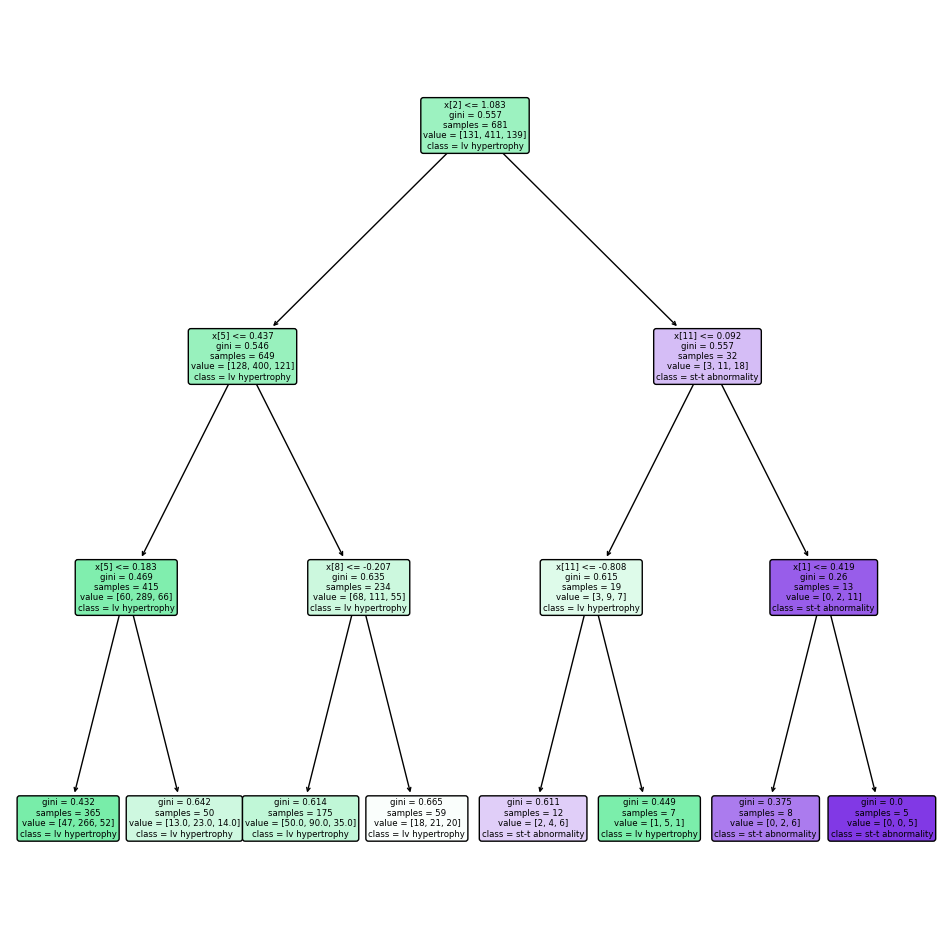

In [46]:
#plot the decision tree
plt.figure(figsize=(12,12))
plot_tree(dec_tree,filled=True,max_depth=3,rounded=True,class_names=['normal','lv hypertrophy','st-t abnormality']);    